In [79]:
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

x = sp.Symbol('x')

def sturm_sequence(f):
    seq = [f, sp.diff(f, x)]
    while True:
        rem = -sp.rem(seq[-2], seq[-1], x)
        if rem == 0:
            break
        seq.append(rem)
    return seq

def sign_symbolic(value):
    if value > 0:
        return '+'
    elif value < 0:
        return '-'
    else:
        return '0'

def sturm_sign_table_with_changes(f, eval_points):
    seq = sturm_sequence(f)
    sign_table = {}
    sign_change_row = []

    for point in eval_points:
        signs = []
        for poly in seq:
            val = poly.subs(x, point).evalf()
            signs.append(sign_symbolic(val))
        sign_table[point] = signs

        # Підрахунок змін знаку (ігноруючи 0)
        nonzero_signs = [s for s in signs if s != '0']
        changes = sum(nonzero_signs[i] != nonzero_signs[i+1] for i in range(len(nonzero_signs)-1))
        sign_change_row.append(changes)

    df = pd.DataFrame(sign_table, index=[f'f{i}' for i in range(len(seq))])
    df.loc["Δ знаків"] = sign_change_row
    return df

f = x**4 - 3*x**3 + 2*x - 4
points = [-2.6, -2, -1.5, -1, -0.5, 0.6, 1.0, 1.5, 2, 2.5, 3, 3.5 ]

df = sturm_sign_table_with_changes(f, points)
df

,-2.6,-2.0,-1.5,-1.0,-0.5,0.6,1.0,1.5,2.0,2.5,3.0,3.5
f0,+,+,+,-,-,-,-,-,-,-,+,+
f1,-,-,-,-,-,-,-,-,-,+,+,+
f2,+,+,+,+,+,+,+,+,+,+,+,+
f3,-,-,-,-,-,-,-,+,+,+,+,+
f4,-,-,-,-,-,-,-,-,-,-,-,-
Δ знаків,3,3,3,2,2,2,2,2,2,2,1,1


In [80]:

x = sp.Symbol('x')

# Заданий поліном
f_expr = x**4 - 3*x**3 + 2*x - 4
f = sp.lambdify(x, f_expr, modules='numpy')
f_prime_expr = sp.diff(f_expr, x)
f_prime = sp.lambdify(x, f_prime_expr, modules='numpy')

def bisection_method(f, a, b, eps=1e-6):
    steps = []
    iteration = 1
    while abs(b - a) > eps:
        c = (a + b) / 2
        error = abs(b - a)
        steps.append((iteration, c, error))
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        iteration += 1

    c = (a + b) / 2
    error = abs(b - a)
    steps.append((iteration, c, error))
    return c, steps


def secant_method(f, a, b, eps=1e-6):
    steps = []
    c_prev = None
    iteration = 1
    while True:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        error = abs(c - c_prev) if c_prev is not None else None
        steps.append((iteration, c, error))
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        if c_prev is not None and error < eps:
            break
        c_prev = c
        iteration += 1
    return c, steps

def newton_method(f, f_prime, x0, eps=1e-6, max_iter=100):
    steps = []
    iteration = 1
    for _ in range(max_iter):
        fx = f(x0)
        fpx = f_prime(x0)
        if fpx == 0:
            break
        x1 = x0 - fx / fpx
        error = abs(x1 - x0)
        steps.append((iteration, x1, error))
        if error < eps or abs(fx) < eps:
            break
        x0 = x1
        iteration += 1
    return x0, steps


a, b = 2.5, 3
x0 = (a+b)/2
eps = 1e-6

root_bisect, bisection_steps = bisection_method(f, a, b, eps)
root_secant, secant_steps = secant_method(f, a, b, eps)
root_newton, newton_steps = newton_method(f, f_prime, x0, eps)


In [82]:
def print_steps(steps, method_name):
    print(f"\n{method_name}:")
    print(f"{'Ітерація':>10} {'x':>25} {'Похибка':>25}")
    for iteration, x, error in steps:
        # Обробка None для першого кроку (як у методі хорд)
        if error is None:
            error_str = f"{'—':>25}"
        else:
            error_str = f"{error:25.15f}"
        print(f"{iteration:10d} {x:25.15f} {error_str}")
print_steps(bisection_steps, "Метод бісекції")
print_steps(secant_steps, "Метод хорд")
print_steps(newton_steps, "Метод Ньютона")



Метод бісекції:
  Ітерація                         x                   Похибка
         1         2.750000000000000         0.500000000000000
         2         2.875000000000000         0.250000000000000
         3         2.937500000000000         0.125000000000000
         4         2.906250000000000         0.062500000000000
         5         2.921875000000000         0.031250000000000
         6         2.929687500000000         0.015625000000000
         7         2.925781250000000         0.007812500000000
         8         2.927734375000000         0.003906250000000
         9         2.926757812500000         0.001953125000000
        10         2.926269531250000         0.000976562500000
        11         2.926025390625000         0.000488281250000
        12         2.926147460937500         0.000244140625000
        13         2.926086425781250         0.000122070312500
        14         2.926055908203125         0.000061035156250
        15         2.926071166992188  

In [83]:

 
# Таблички
def steps_to_dataframe(steps, method_name):
    df = pd.DataFrame(steps, columns=["Ітерація", "x", "Похибка"])
    df["Метод"] = method_name
    return df

df_bisection = steps_to_dataframe(bisection_steps, "Бісекція")
df_secant = steps_to_dataframe(secant_steps, "Хорди")
df_newton = steps_to_dataframe(newton_steps, "Ньютон")
df_all = pd.concat([df_bisection, df_secant, df_newton], ignore_index=True)
df_all

,Ітерація,x,Похибка,Метод
0,1,2.750000,5.000000e-01,Бісекція
1,2,2.875000,2.500000e-01,Бісекція
2,3,2.937500,1.250000e-01,Бісекція
3,4,2.906250,6.250000e-02,Бісекція
4,5,2.921875,3.125000e-02,Бісекція
5,6,2.929688,1.562500e-02,Бісекція
6,7,2.925781,7.812500e-03,Бісекція
7,8,2.927734,3.906250e-03,Бісекція
8,9,2.926758,1.953125e-03,Бісекція
9,10,2.926270,9.765625e-04,Бісекція


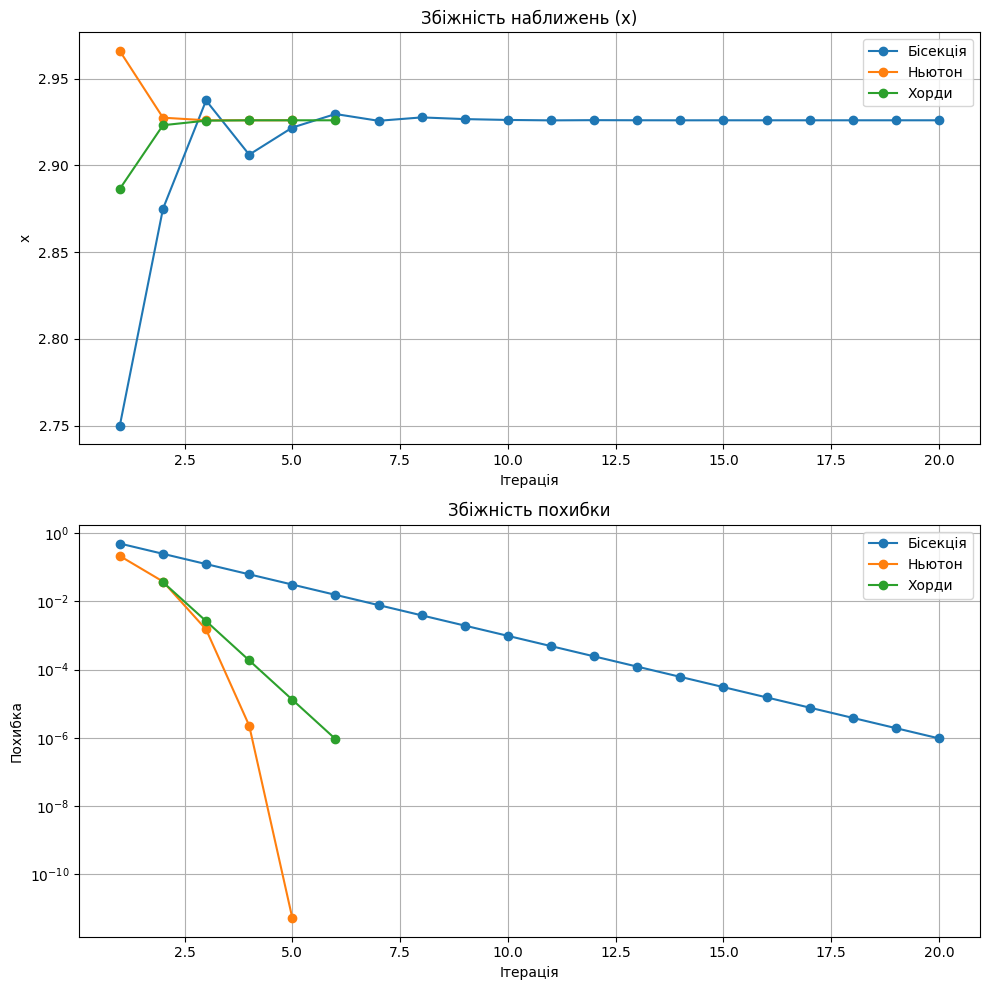

In [84]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 1. Значення x
for method, df in df_all.groupby("Метод"):
    axs[0].plot(df["Ітерація"], df["x"], marker='o', label=method)
axs[0].set_title("Збіжність наближень (x)")
axs[0].set_xlabel("Ітерація")
axs[0].set_ylabel("x")
axs[0].legend()
axs[0].grid(True)

# 2. Похибка
for method, df in df_all.groupby("Метод"):
    axs[1].plot(df["Ітерація"], df["Похибка"], marker='o', label=method)
axs[1].set_title("Збіжність похибки")
axs[1].set_xlabel("Ітерація")
axs[1].set_ylabel("Похибка")
axs[1].set_yscale("log")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



In [86]:
a, b = -1.5, -1
x0 = (a+b)/2
eps = 1e-6

root_bisect2, bisection_steps2 = bisection_method(f, a, b, eps)
root_secant2, secant_steps2 = secant_method(f, a, b, eps)
root_newton2, newton_steps2 = newton_method(f, f_prime, x0, eps)
print_steps(bisection_steps2, "Метод бісекції")
print_steps(secant_steps2, "Метод хорд")
print_steps(newton_steps2, "Метод Ньютона")


Метод бісекції:
  Ітерація                         x                   Похибка
         1        -1.250000000000000         0.500000000000000
         2        -1.125000000000000         0.250000000000000
         3        -1.187500000000000         0.125000000000000
         4        -1.156250000000000         0.062500000000000
         5        -1.140625000000000         0.031250000000000
         6        -1.148437500000000         0.015625000000000
         7        -1.152343750000000         0.007812500000000
         8        -1.150390625000000         0.003906250000000
         9        -1.149414062500000         0.001953125000000
        10        -1.148925781250000         0.000976562500000
        11        -1.149169921875000         0.000488281250000
        12        -1.149291992187500         0.000244140625000
        13        -1.149230957031250         0.000122070312500
        14        -1.149261474609375         0.000061035156250
        15        -1.149276733398438  

In [87]:
df_bisection2 = steps_to_dataframe(bisection_steps2, "Бісекція")
df_secant2 = steps_to_dataframe(secant_steps2, "Хорди")
df_newton2 = steps_to_dataframe(newton_steps2, "Ньютон")
df_all2 = pd.concat([df_bisection2, df_secant2, df_newton2], ignore_index=True)
df_all2

,Ітерація,x,Похибка,Метод
0,1,-1.250000,5.000000e-01,Бісекція
1,2,-1.125000,2.500000e-01,Бісекція
2,3,-1.187500,1.250000e-01,Бісекція
3,4,-1.156250,6.250000e-02,Бісекція
4,5,-1.140625,3.125000e-02,Бісекція
5,6,-1.148438,1.562500e-02,Бісекція
6,7,-1.152344,7.812500e-03,Бісекція
7,8,-1.150391,3.906250e-03,Бісекція
8,9,-1.149414,1.953125e-03,Бісекція
9,10,-1.148926,9.765625e-04,Бісекція


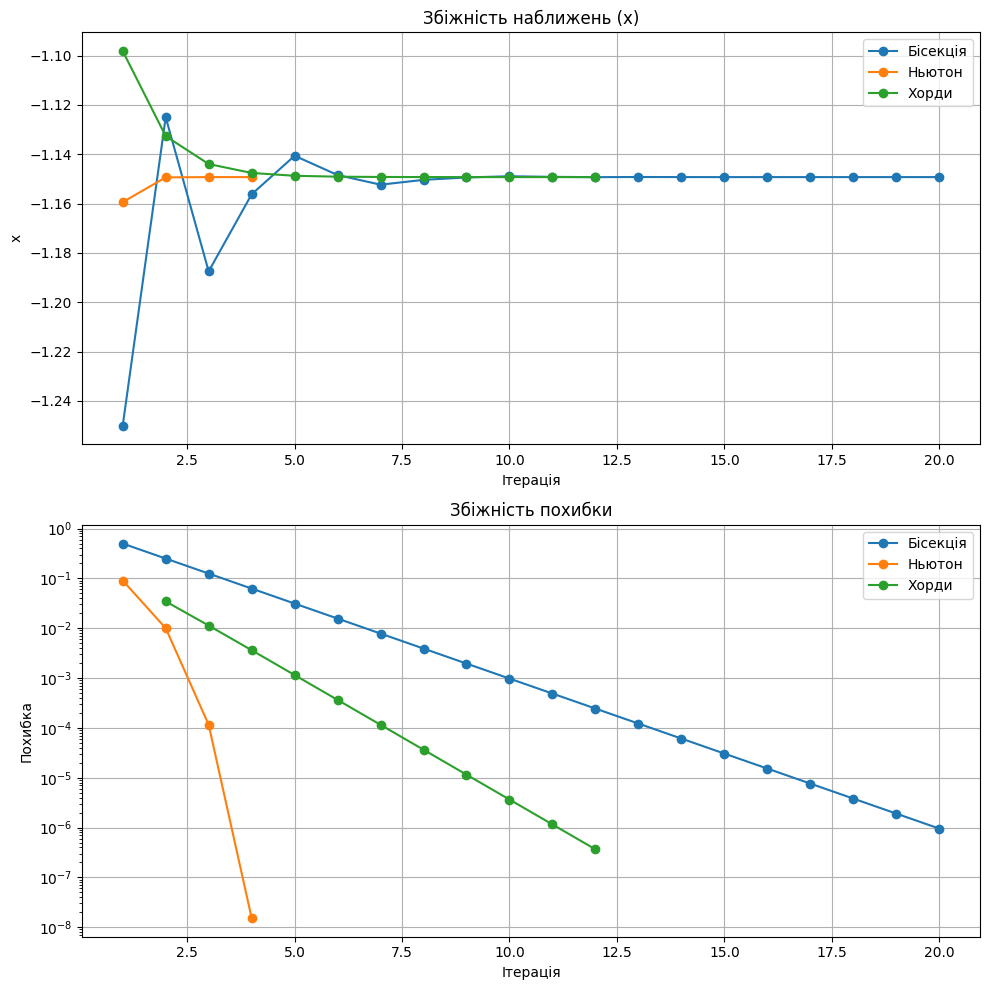

In [88]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 1. Значення x
for method, df in df_all2.groupby("Метод"):
    axs[0].plot(df["Ітерація"], df["x"], marker='o', label=method)
axs[0].set_title("Збіжність наближень (x)")
axs[0].set_xlabel("Ітерація")
axs[0].set_ylabel("x")
axs[0].legend()
axs[0].grid(True)

# 2. Похибка
for method, df in df_all2.groupby("Метод"):
    axs[1].plot(df["Ітерація"], df["Похибка"], marker='o', label=method)
axs[1].set_title("Збіжність похибки")
axs[1].set_xlabel("Ітерація")
axs[1].set_ylabel("Похибка")
axs[1].set_yscale("log")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()